In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
referral_df = pd.read_csv('referral.csv')
surgery_df = pd.read_csv('surgery.csv')

In [3]:
codes = surgery_df['NHS Trust/ Health Board code']
num_cases = surgery_df['Total cases']
mortality_30d = [float(i.replace("%", "")) for i in surgery_df['Adjusted 30 day mortality rate ']]
print(mortality_30d)

[2.4, 0.8, 2.6, 3.6, 0.4, 1.0, 3.3, 1.4, 0.3, 1.4, 5.5, 2.3, 0.0, 0.8, 2.1, 1.6, 0.0, 0.0, 1.2, 0.6, 1.3, 3.2, 2.9, 1.9, 1.0, 2.5, 6.7, 0.0, 0.9, 1.5, 2.4, 0.5, 2.4, 0.4, 0.0]


In [4]:
# emergency_admissions = [float(i.replace("%", "") for i in referral_df["Adjusted % diagnosed after emergency admission "]]
# print(emergency_admissions)

Text(0, 0.5, 'Mortality rate after 30 days')

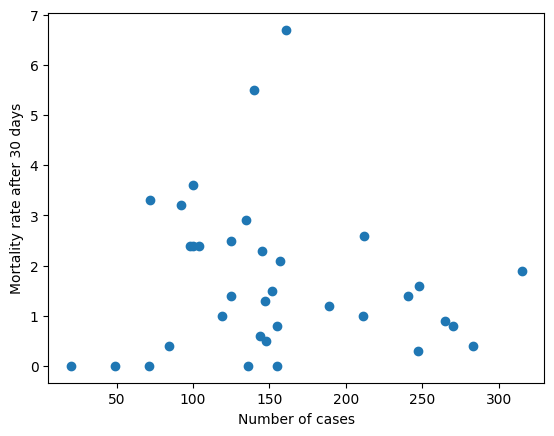

In [5]:
plt.scatter(num_cases, mortality_30d, marker='o')
plt.xlabel('Number of cases')
plt.ylabel('Mortality rate after 30 days')

 % with clinical stage 0-3  % with clinical stage 4
                 63.916213                36.083787
                 59.126062                40.873938
                 55.736965                44.263035
                 54.498592                45.501408
                 60.199544                39.800456
                 54.482339                45.517661
                 50.731976                49.268024
                 55.340356                44.659644
                 44.069069                55.930931
                 58.045064                41.954936
                 57.679181                42.320819
                 53.331960                46.668040
                 59.954287                40.045713
                 64.402308                35.597692
                 54.633461                45.366539
                 84.408807                15.591193
                 49.577416                50.422584
                 52.766678                47.233322
            

Text(0, 0.5, 'Cancer Alliance or Welsh Region')

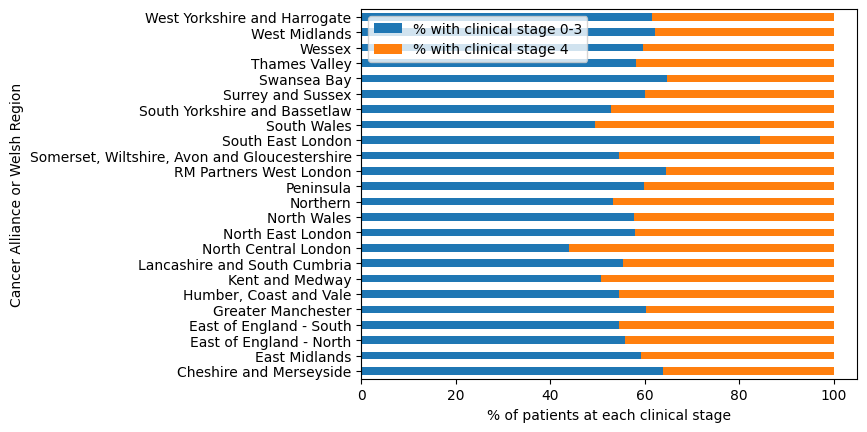

In [6]:
# Convert the "% with clinical stage 0-3" column to numeric and drop non-numeric values
plot_df = referral_df[["Cancer Alliance or Welsh Region", "% with clinical stage 0-3"]].dropna()
plot_df["% with clinical stage 0-3"] = plot_df["% with clinical stage 0-3"].dropna()
plot_df["% with clinical stage 0-3"] = pd.to_numeric(plot_df["% with clinical stage 0-3"], errors='coerce')
plot_df.dropna(inplace=True)
plot_df["% with clinical stage 4"] = 100 - plot_df["% with clinical stage 0-3"]

plot_df = plot_df.groupby('Cancer Alliance or Welsh Region').mean().reset_index()
plot_df.set_index("Cancer Alliance or Welsh Region", inplace=True)

print(plot_df.to_string(index=False, max_rows=None))

# Add a new column "% with clinical stage 4" to plot_df
# plot_df["% with clinical stage 4"] = referral_df["% with clinical stage 4"]

ax = plot_df.plot( 
    kind = 'barh', 
    stacked = True
) 
ax.set_xlabel("% of patients at each clinical stage")
ax.set_ylabel("Cancer Alliance or Welsh Region")

In [7]:
from scipy import stats

idx = "Cancer Alliance or Welsh Region"
col = "Adjusted % diagnosed after emergency admission "

def percent_to_numeric(value):
    try:
        num = float(value.replace("%", ""))
    except:
        num = float('nan')
    return num

plot_df = referral_df[[idx, col]].dropna()
plot_df[col] = plot_df[col].dropna()
plot_df[col] = plot_df[col].apply(percent_to_numeric)
plot_df.dropna(inplace=True)

# plot_df = plot_df.groupby('Cancer Alliance or Welsh Region').mean().reset_index()
# plot_df.set_index("Cancer Alliance or Welsh Region")
print(plot_df.to_string(index=False, max_rows=None))

# plot_df.dropna(inplace=True)




              Cancer Alliance or Welsh Region  Adjusted % diagnosed after emergency admission 
                      Cheshire and Merseyside                                             27.9
                      Cheshire and Merseyside                                             11.6
                      Cheshire and Merseyside                                             13.9
                      Cheshire and Merseyside                                             11.8
                      Cheshire and Merseyside                                             14.2
                      Cheshire and Merseyside                                             32.9
                      Cheshire and Merseyside                                             14.5
                                West Midlands                                              7.1
                                West Midlands                                             13.3
                                West Midlands     

In [49]:
import numpy as np

def convert_percentage_to_float(percentage_str):
    try:
        # Convert percentage string to float
        return float(percentage_str.strip('%'))
    except (ValueError, AttributeError):
        # Return NaN for invalid or NaN values
        return np.nan

# Import from csv
referral_df = pd.read_csv('referral.csv')
surgery_df = pd.read_csv('surgery.csv').set_index('NHS Trust/ Health Board code')

# Filter the referral dataset to only include trusts also in the surgery dataset
trusts = list(surgery_df.index)
new_ds = referral_df.set_index('NHS Trust/ Health Board code').loc[trusts, :]


# Merge with surgery dataset
new_ds = pd.merge(new_ds, surgery_df, left_index=True, right_index=True)

# Clean data
new_ds = new_ds.replace('<10', '5')
new_ds = new_ds.replace('<5', '3')
new_ds = new_ds.replace('85 to 100', '92')
new_ds = new_ds.replace('75 to 100', '92')
new_ds = new_ds.replace('*', np.nan)

new_ds = new_ds.drop(columns=['Cancer Alliance or Welsh Region_x', 'Case ascertainment %', 'NHS Trust/Health Board name_x', "Cancer Alliance or Welsh Region_y", 'NHS Trust/Health Board name_y'])
new_ds = new_ds.apply(lambda col: col.apply(convert_percentage_to_float) if any('%' in str(val) for val in col) else col)
new_ds.to_csv('cleaned.csv')

# new_ds = new_ds.apply(pd.to_numeric, errors='coerce')
# new_ds = new_ds.dropna(axis=1, how='any')

corr = new_ds.corr()

corr.to_csv('corr.csv')